<a href="https://colab.research.google.com/github/Saifulislam365/studi_independent/blob/main/Latihan_30_3_Student_Ind_RB_10_3_Text_Summarization_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization Menggunakan Metode Maximum Marginal Relevance (MMR)


Link repo github kode: https://github.com/fajri91/Text-Summarization-MMR

## Pada proyek ini kita menggunakan tools (paket) sastrawi untuk melakukan stemming pada teks. Kenapa menggunakan tools ini, karena memang kita akan meringkas teks yang berbahasa Indonesia.

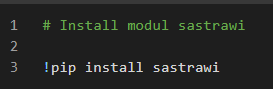

In [ ]:
# Ketik kode disini

!pip install sastrawi

# Import modul (tools)

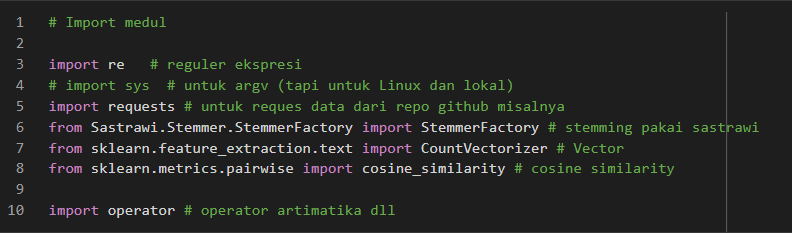

In [ ]:
# Ketik kode disini
import re
import requests
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [ ]:
a = 2
b = 3
c = operator.add(a,b)

c

# Tahap Stemming pada teks berbahasa Indonesia

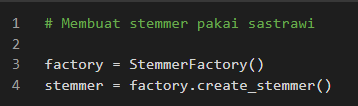

In [ ]:
# Ketik kode disini

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load stopwords list dari repo github, yang akan dipakai untuk menghapus stopwords yang ada di teks

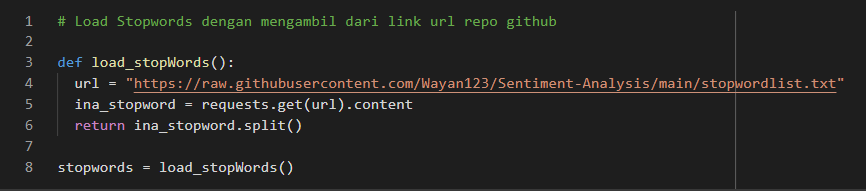

url: https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt

In [ ]:
# Ketik kode disini

def load_stopWords():
  url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt"
  ina_stopword = requests.get(url).content
  return ina_stopword.split()

stopwords = load_stopWords()

In [ ]:
stopwords

In [ ]:
total = len(stopwords)
total

# Kita bisa melihat list stopwords dengan run stopwords

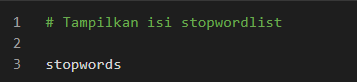

In [ ]:
# Ketik kode disini

## Membuat fungsi untuk stemmer

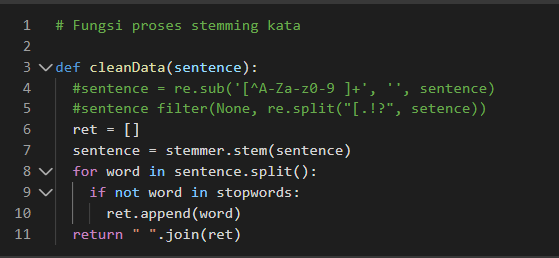

In [ ]:
def cleanData(sentence):
  ret = []
  sentence = stemmer.stem(sentence)
  for word in sentence.split():
    if not word in stopwords:
      ret.append(word)
  return " ".join(ret)

In [ ]:
# Ketik kode diisni

## Membuat fungsi untuk vektor kata

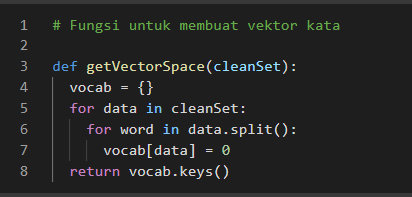

In [ ]:
# Ketik kode diisni

def getVectorSpace(cleanSet):
  vocab = {}
  for data in cleanSet:
    for word in data.split():
      vocab[data] = 0
  return vocab.keys()

## Membuat fungsi untuk menghitung cosine similarity

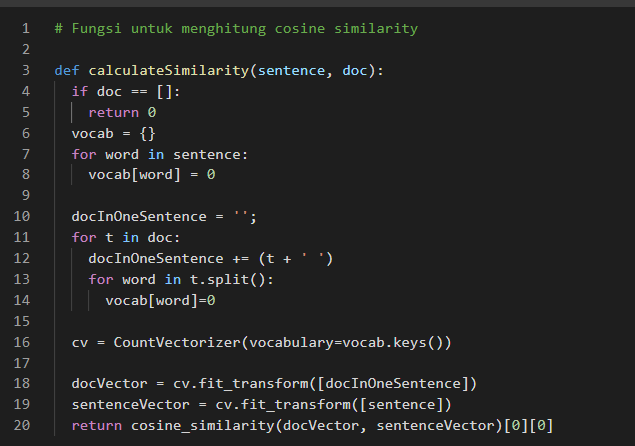

In [ ]:
def calculateSimilarity(sentence, doc):
  if doc == []:
    return 0
  vocab = {}
  for word in sentence:
    vocab[word] = 0

  docInOneSentence = '';
  for t in doc:
    docInOneSentence += (t + ' ')
    for word in t.split():
      vocab[word] = 0

  cv = CountVectorizer(vocabulary = vocab.keys())

  docVector = cv.fit_transform([docInOneSentence])
  sentenceVector = cv.fit_transform([sentence])
  return cosine_similarity(docVector, sentenceVector)[0][0]

In [ ]:
# Fungsi untuk menghitung cosine similarity



# Load raw data teks dari repo github

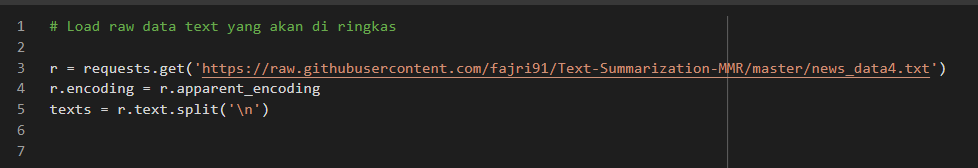

url: https://raw.githubusercontent.com/fajri91/Text-Summarization-MMR/master/news_data4.txt

In [ ]:
# Load raw data 

r = requests.get('https://raw.githubusercontent.com/fajri91/Text-Summarization-MMR/master/news_data.txt')
r.encoding = r.apparent_encoding
texts = r.text.split('\n')

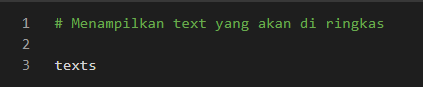

In [ ]:
texts

In [ ]:
# Menampilkan text yang akan di ringkas


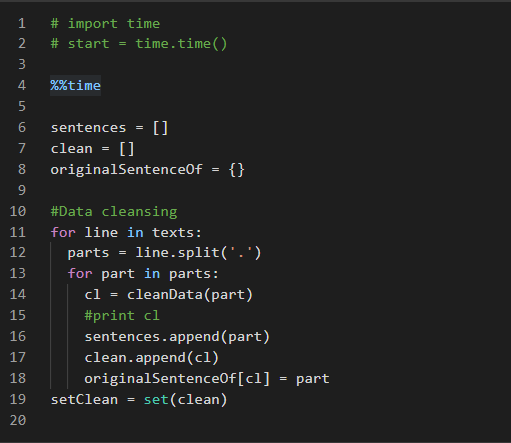

In [ ]:
%%time

sentences = []
clean = []
originalSentenceOf = {}

# datacleaning
for line in texts:
  parts = line.split('.')
  for part in parts:
    cl = cleanData(part)

    sentences.append(part)
    clean.append(cl)
    originalSentenceOf[cl] = part

setClean = set(clean)

In [ ]:
cl

## Menghitung nilai cosine similarity

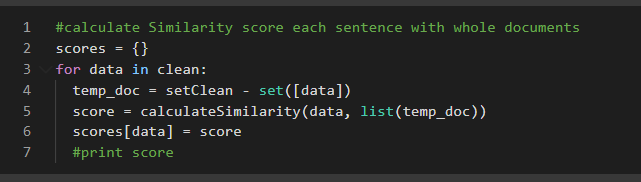

In [ ]:
scores = {}
for data in clean:
  temp_doc = setClean - set([data])
  score = calculateSimilarity(data, list(temp_doc))
  scores[data] = score

In [ ]:
scores

In [ ]:
#calculate Similarity score each sentence with whole documents		


# Untuk menghitung summarization kita menggunakan Algoritma MMR

Algoritma MMR (Maximum Marginal Relevance) merupakan metode ekstraksi ringkasan yang digunakan untuk meringkas dokumen tunggal maupun multi dokumen.

MMR meringkas dokumen dengan melakukan  perhitungan  kesamaan antara bagian teks. Pada peringkasan   dokumen dilakukan proses segmentasi dokumen menjadi kalimat dan dilakukan pengelompokan sesuai dengan gender kalimat tersebut.

MMR digunakan dengan mengkombinasikan matrik cosine similarity untuk merangking kalimat-kalimat sebagai tanggapan pada query yang diberikan oleh user.


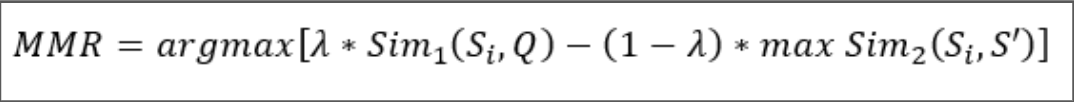

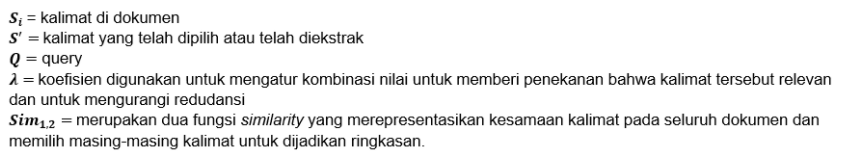

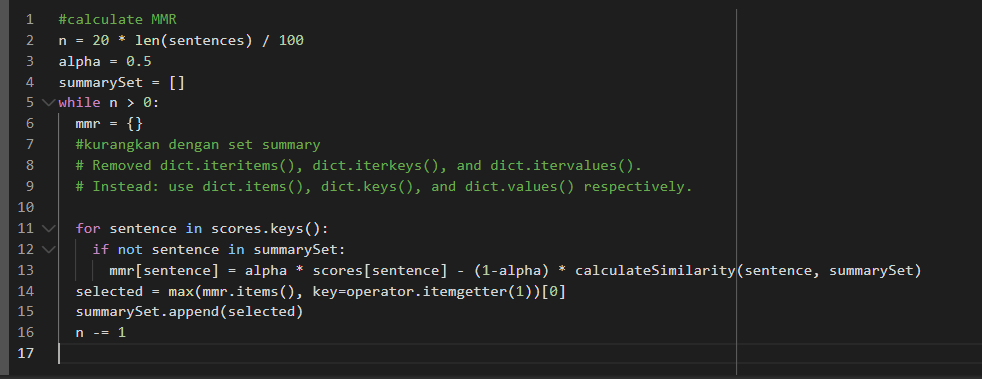

In [ ]:
#calculate MMR
n = 20 * len(sentences) / 100
alpha = 0.5
summarySet = []

while n > 0:
  mmr = {} 

  for sentence in scores.keys():
    if not sentence in summarySet:
      mmr[sentence] = alpha * scores[sentence] - (1-alpha) * calculateSimilarity(sentence, summarySet)
  selected = max(mmr.items(), key = operator.itemgetter(1))[0]
  summarySet.append(selected)
  n -= 1




In [ ]:
sentences

In [ ]:
n

## Menampilkan hasil Summary dari hasil perhitungan Algoritma MMR

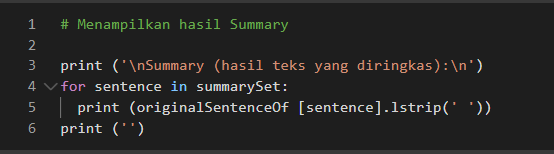

In [ ]:


print ('\nSummary (hasil teks yang diringkas):\n')
for sentence in summarySet:
	print (originalSentenceOf [sentence].lstrip(' '))
print ('')

In [ ]:
# Menampilkan hasil Summary


## Menampilkan perbandingan Summary text dengan teks asli sebelum si summary. Setiap kalimat yang di jadikan sebagai summary akan di highlight merah.

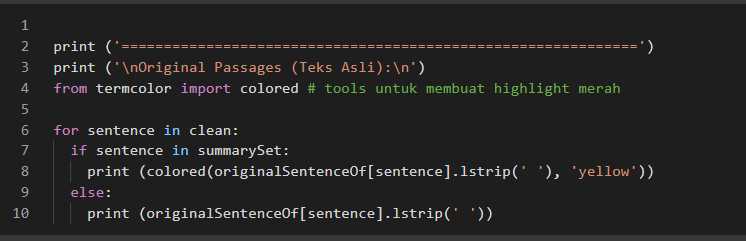

In [ ]:
print ('=============================================================')
print ('\nOriginal Passages (Teks Asli):\n')
from termcolor import colored # tools untuk membuat highlight merah

for sentence in clean:
	if sentence in summarySet:
		print (colored(originalSentenceOf[sentence].lstrip(' '), 'yellow'))
	else:
		print (originalSentenceOf[sentence].lstrip(' '))

## Activity:
Waktu pengerjaan 30-60 menit dan buat 4-5 kelompok.

1. Gunakan teknik "heapq" untuk teks berbahasa Indonesia

- Gunakan corpus minimal 1 artikel dan harus dengan topik terkini (preprocessing boleh dilakukan secara manual dan boleh dilakukan secara otomatis dengan kode)
- Lakukan proses stemming dan gunakan stopwordslist Indonesia yang tersedia di repositori github https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt

2. Gunakan metode "MMR" untuk Teks berbahasa Inggris

- Gunakan corpus minimal 1 artikel dan harus dengan topik terkini (preprocessing boleh dilakukan secara manual dan boleh dilakukan secara otomatis dengan kode)

Note: Teks boleh di scraping menggunakan tools seperti beautifulsoup4, scrapy, dan silakan di improve dan buat sesuai kemampuan.

